# Fuel Consumption Prediction of Vehicles

## Objective
The goal of this project is to predict the **fuel consumption (MPG)** of vehicles based on their attributes, including engine specifications, weight, and acceleration.

## Dataset Overview
The dataset contains records of vehicles with features relevant to fuel efficiency prediction.

## Instructions
1. **Data Exploration**: Load and examine the dataset.
2. **Data Preprocessing**: Handle missing values, encode categorical variables, and normalize numerical features.
3. **Feature Selection**: Identify important predictors for fuel efficiency.
4. **Model Training**: Train a regression model to predict fuel consumption (MPG).
5. **Evaluation**: Assess model performance using RMSE and R² score.

## Exploratory Data Analysis (EDA)
- Check for missing values
- Visualize key distributions
- Identify correlations between features

## Data Preprocessing
- Handle missing values
- Encode categorical variables
- Normalize numerical features

## Model Training
Train a **Linear Regression** model to predict fuel consumption.

C:\Users\dell\AppData\Local\Temp\ipykernel_15452\3777017526.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=column_names, na_values='?')


<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 18.0 to 31.0
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    int64  
 1   cylinders     398 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    int64  
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 28.0+ KB
None
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
18.0    8      307.0         130.0      3504.0    12.0            70   
15.0    8      350.0         165.0      3693.0    11.5            70   
18.0    8      318.0         150.0      3436.0    11.0            70   
16.0    8      304.0         150.0      3433.0    12.0            70   
17.0    8      302.0         140.0     

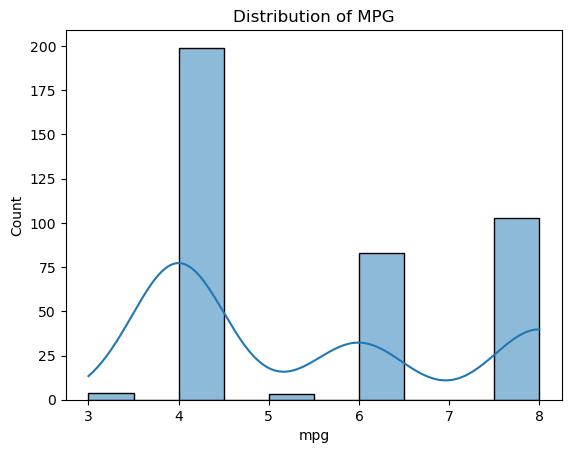

ValueError: could not convert string to float: 'chevrolet chevelle malibu'

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 2. Load Dataset
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight",
                "acceleration", "model_year", "origin"]
df = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=column_names, na_values='?')

# 3. Basic Info
print(df.info())
print(df.head())

# 4. Handle Missing Values
df.dropna(inplace=True)

# 5. Exploratory Data Analysis (Optional Visuals)
sns.histplot(df["mpg"], kde=True)
plt.title("Distribution of MPG")
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 6. Encode Categorical Variable
df['origin'] = df['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
df = pd.get_dummies(df, columns=['origin'], drop_first=True)

# 7. Feature and Target Split
X = df.drop("mpg", axis=1)
y = df["mpg"]

# 8. Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 9. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 10. Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# 11. Predictions
y_pred = model.predict(X_test)

# 12. Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
